In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
def plota_pivot_table(df, value, index, func, ylabel, xlabel, opcao='nada'):
    if opcao == 'nada':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).plot(figsize=[15, 5])
    elif opcao == 'sort':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).sort_values(value).plot(figsize=[15, 5])
    elif opcao == 'unstack':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).unstack().plot(figsize=[15, 5])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    return None

In [3]:
sinasc = pd.read_csv('/content/SINASC_RO_2019_JAN.csv')
sinasc.head()

,IDADEMAE,SEXO,APGAR1,APGAR5,PESO,CONSULTAS,DTNASC,GESTACAO,GRAVIDEZ,ESCMAE,IDADEPAI
0,29,Feminino,7.0,9.0,3020,4,2019-01-16,37 a 41 semanas,Única,12 anos ou mais,NaN
1,25,Masculino,7.0,9.0,3000,4,2019-01-24,37 a 41 semanas,Única,12 anos ou mais,NaN
2,35,Feminino,9.0,10.0,3390,4,2019-01-02,37 a 41 semanas,Única,8 a 11 anos,NaN
3,24,Masculino,8.0,9.0,2920,3,2019-01-07,37 a 41 semanas,Única,12 anos ou mais,NaN
4,26,Feminino,9.0,9.0,3320,4,2019-01-15,37 a 41 semanas,Única,12 anos ou mais,NaN


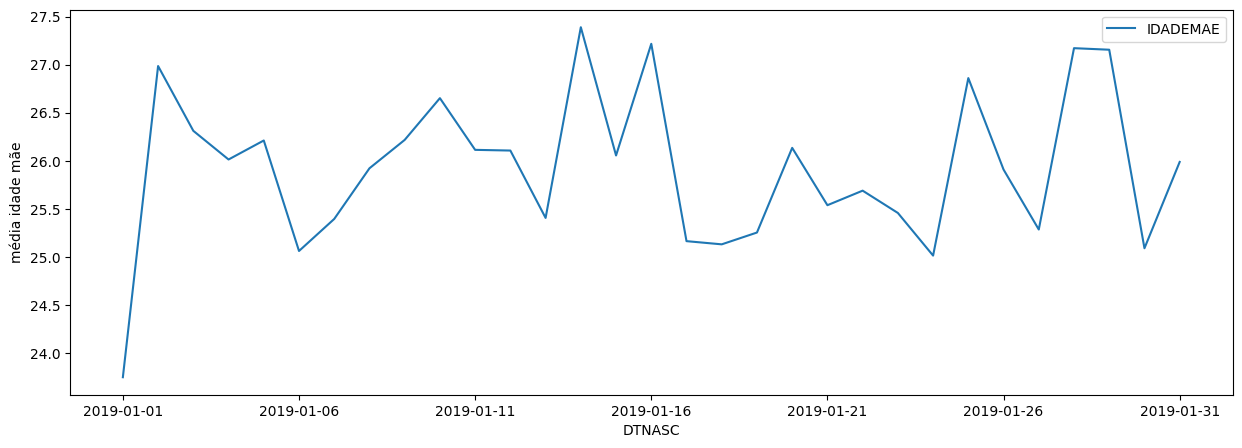

In [4]:
pd.pivot_table(sinasc, values='IDADEMAE', index='DTNASC',
               aggfunc='mean').plot(figsize=[15, 5])
plt.ylabel('média idade mãe');

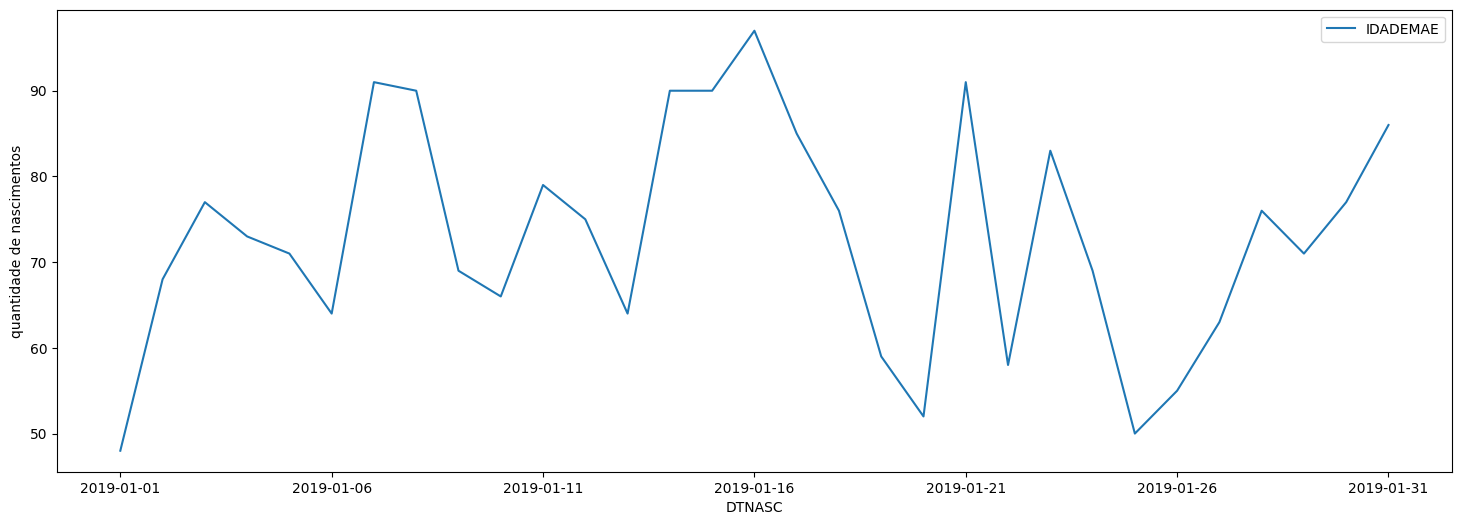

In [5]:
pd.pivot_table(sinasc, values='IDADEMAE', index='DTNASC',
               aggfunc='count').plot(figsize=[18, 6])
plt.ylabel('quantidade de nascimentos');

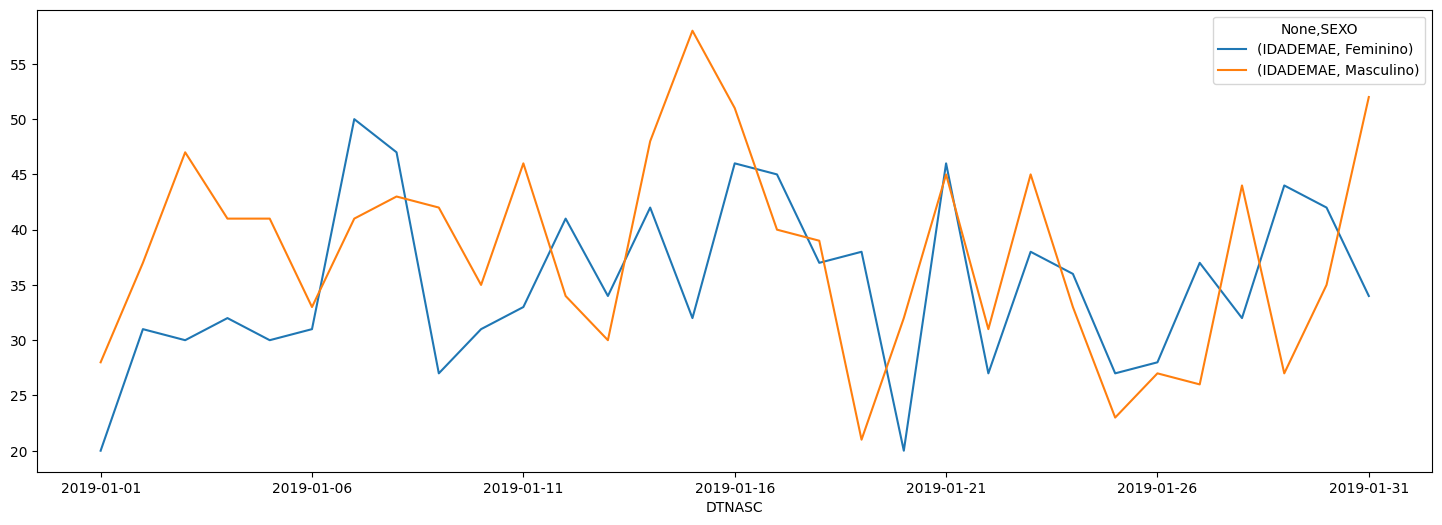

In [6]:
pd.pivot_table(sinasc, values='IDADEMAE', index=['DTNASC', 'SEXO'],
               aggfunc='count').unstack().plot(figsize=[18, 6]);

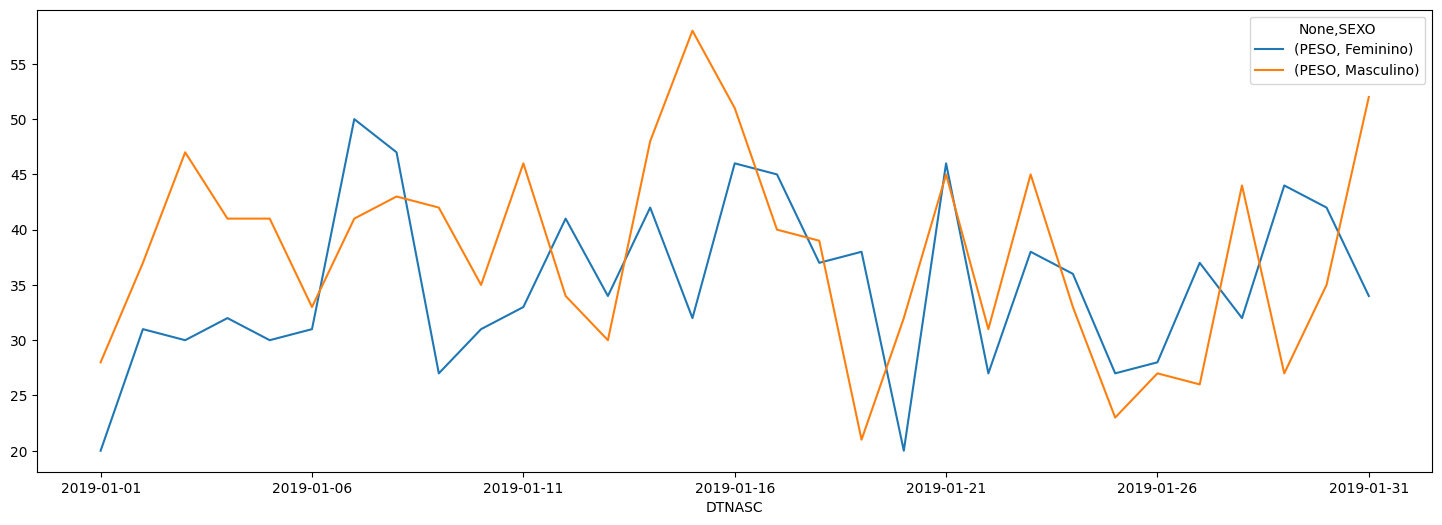

In [7]:
pd.pivot_table(sinasc, values='PESO', index=['DTNASC', 'SEXO'],
               aggfunc='count').unstack().plot(figsize=[18, 6]);

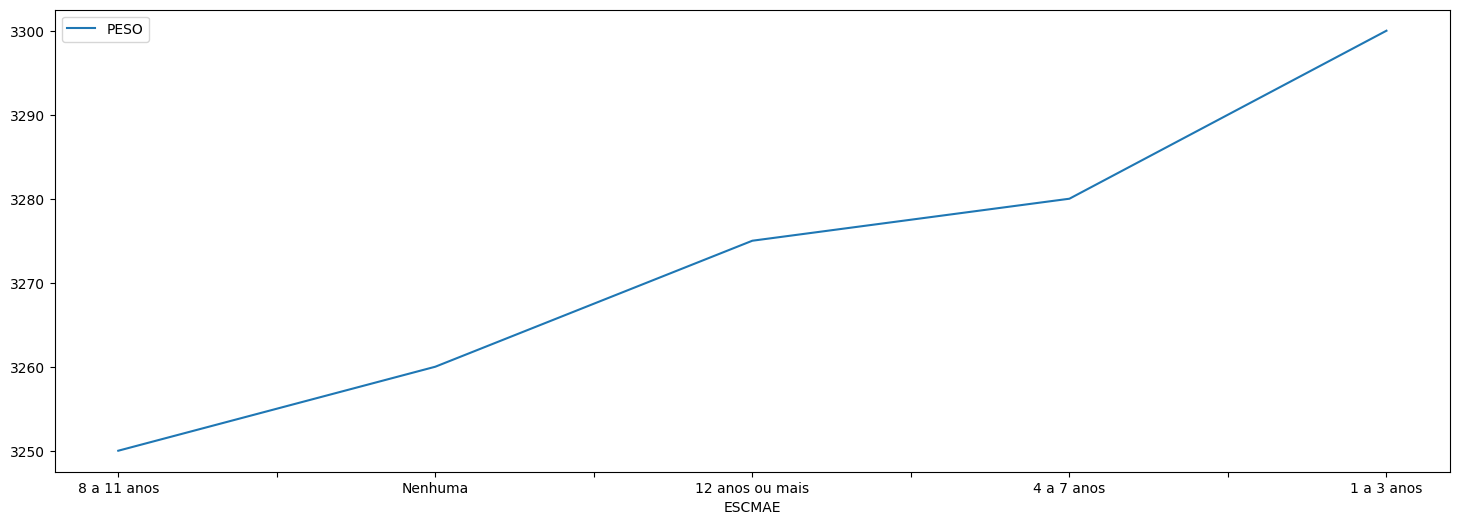

In [8]:
pd.pivot_table(sinasc, values='PESO', index=['ESCMAE'],
               aggfunc='median').sort_values('PESO').plot(figsize=[18, 6]);

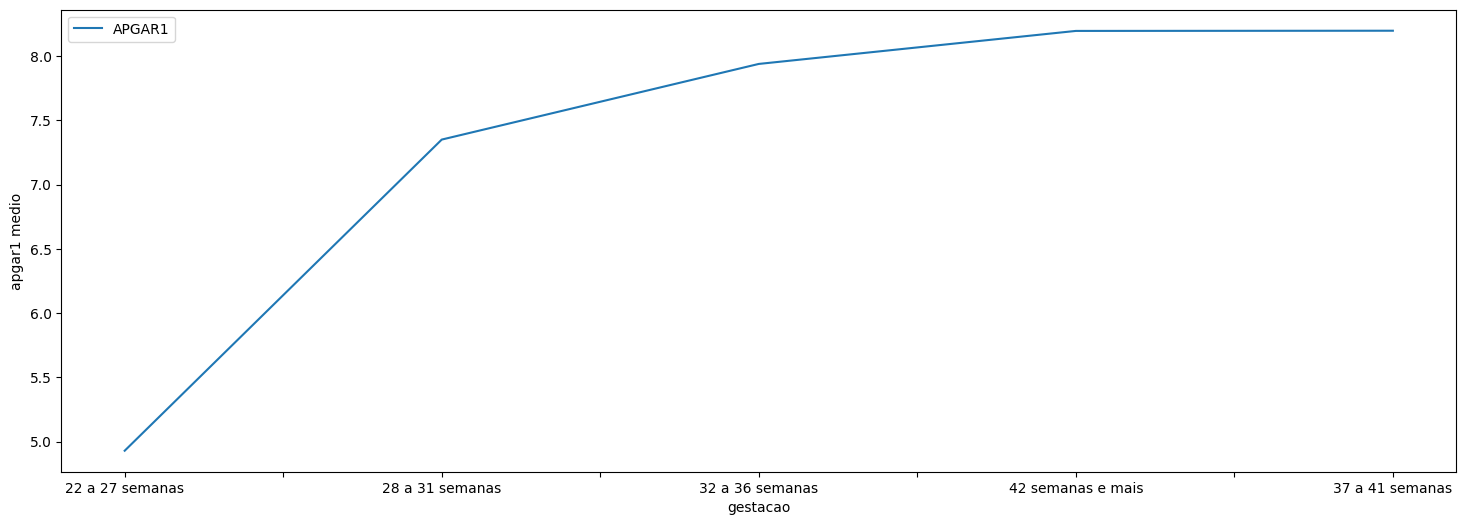

In [9]:
pd.pivot_table(sinasc, values='APGAR1', index=['GESTACAO'],
               aggfunc='mean').sort_values('APGAR1').plot(figsize=[18, 6])
plt.ylabel('apgar1 medio')
plt.xlabel('gestacao');


In [10]:
max_data = sinasc.DTNASC.max()[:7]
max_data

'2019-01'

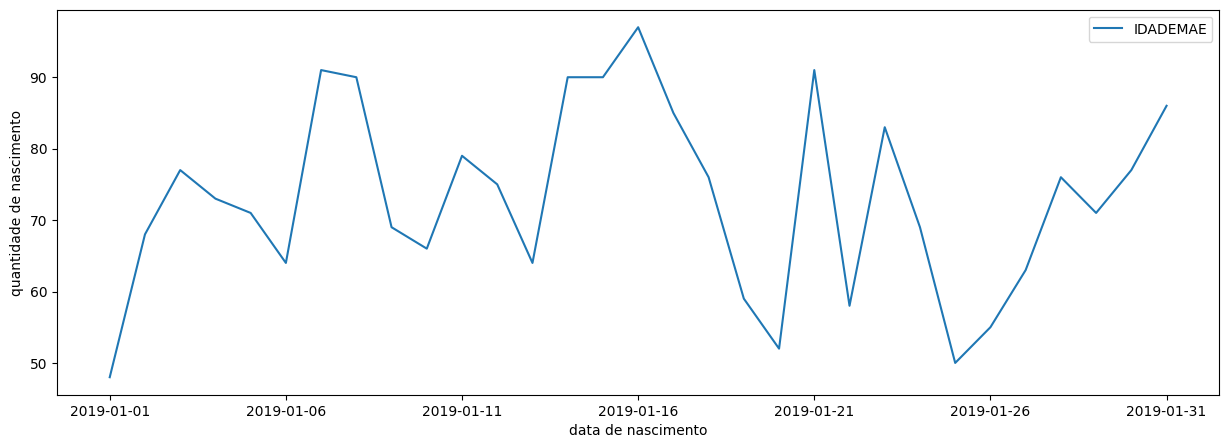

In [11]:
plota_pivot_table(sinasc, 'IDADEMAE', 'DTNASC', 'count', 'quantidade de nascimento','data de nascimento')

In [12]:
pwd

'/content'

In [13]:
max_data = sinasc.DTNASC.max()[:7]
max_data

'2019-01'

In [16]:
os.makedirs('./output/figs/'+max_data, exist_ok=True)

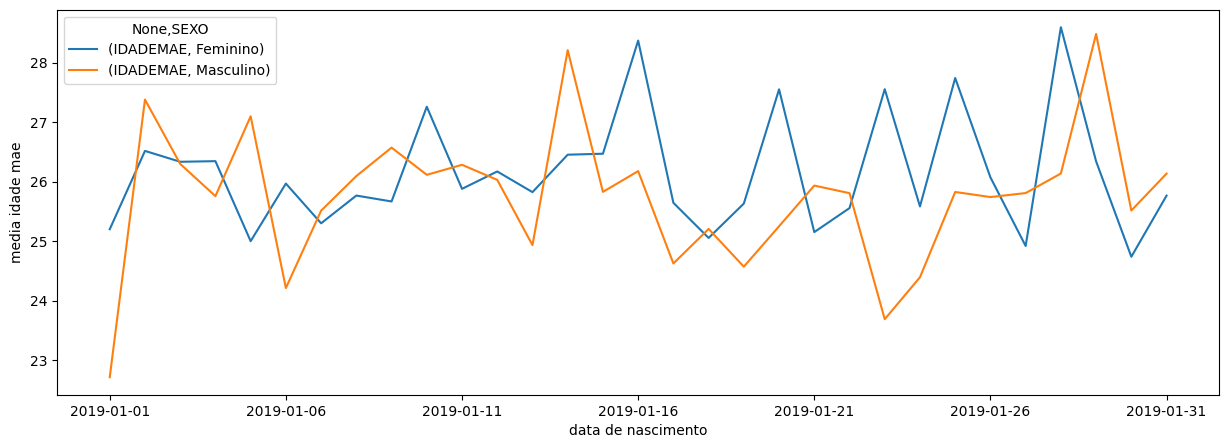

In [17]:
plota_pivot_table(sinasc, 'IDADEMAE', ['DTNASC', 'SEXO'], 'mean', 'media idade mae','data de nascimento','unstack')
plt.savefig('./output/figs/'+max_data+'/media idade mae por sexo.png')

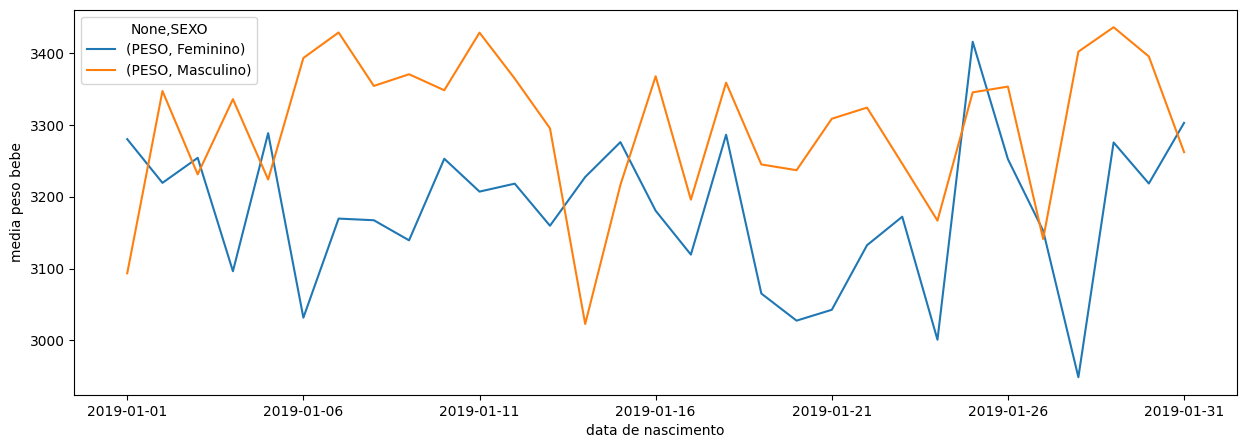

In [18]:
plota_pivot_table(sinasc, 'PESO', ['DTNASC', 'SEXO'], 'mean', 'media peso bebe','data de nascimento','unstack')
plt.savefig('./output/figs/'+max_data+'/media peso bebe por sexo.png')

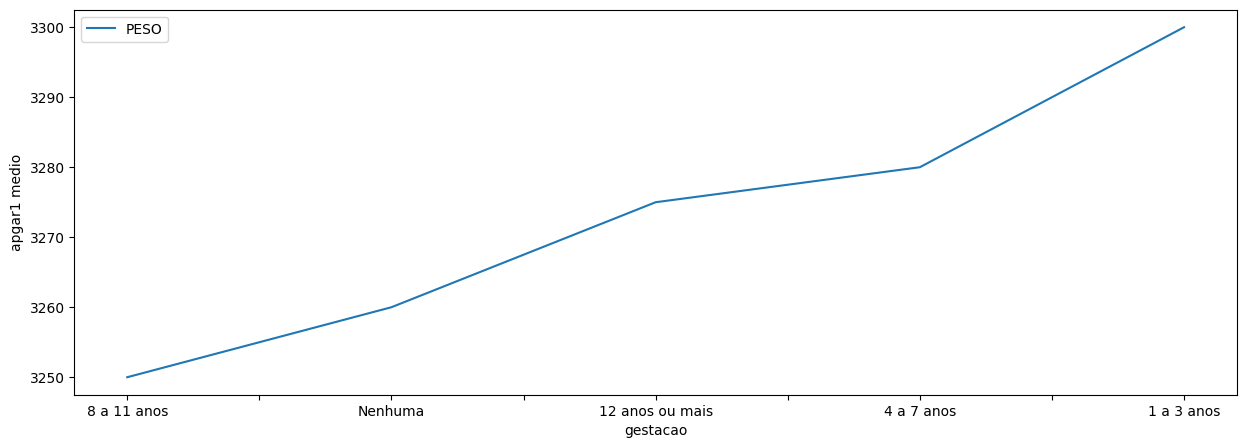

In [19]:
plota_pivot_table(sinasc, 'PESO', 'ESCMAE', 'median', 'apgar1 medio','gestacao','sort')
plt.savefig('./output/figs/'+max_data+'/media apgar1 por escolaridade mae.png')

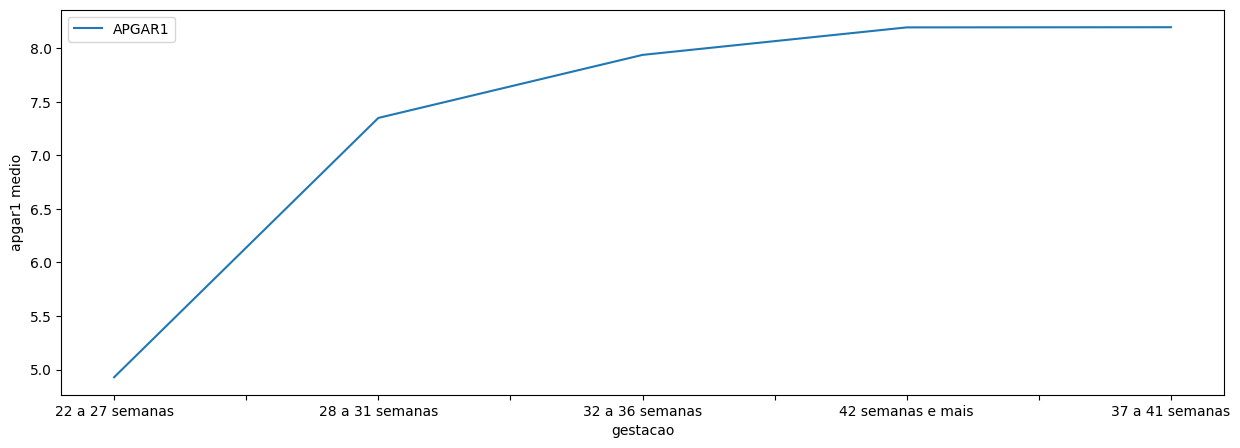

In [20]:
plota_pivot_table(sinasc, 'APGAR1', 'GESTACAO', 'mean', 'apgar1 medio','gestacao','sort')
plt.savefig('./output/figs/'+max_data+'/media apgar1 por gestacao.png')

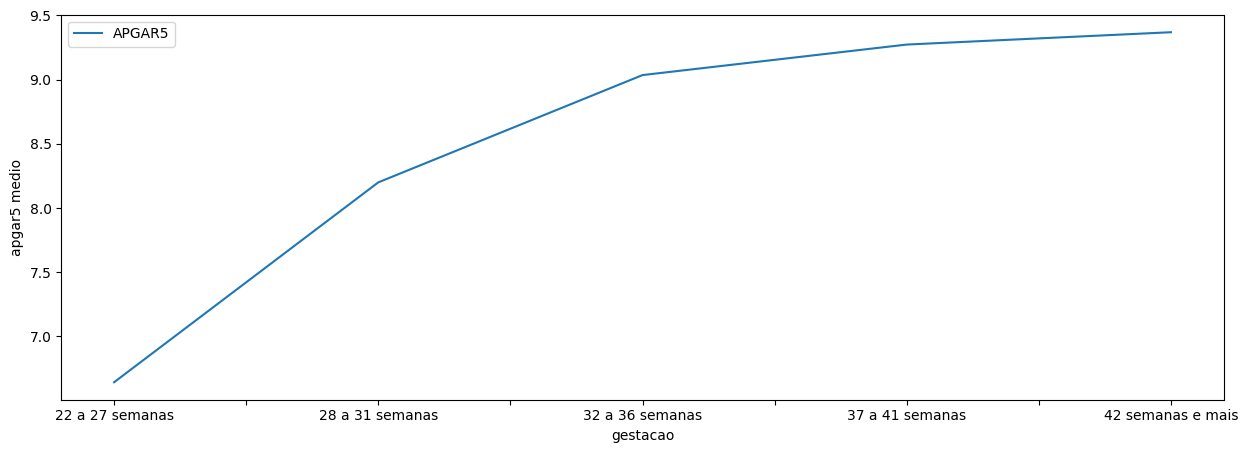

In [21]:
plota_pivot_table(sinasc, 'APGAR5', 'GESTACAO', 'mean', 'apgar5 medio','gestacao','sort')
plt.savefig('./output/figs/'+max_data+'/media apgar5 por gestacao.png')

In [23]:
df = pd.read_csv('/content/SINASC_RO_2019_JAN.csv')

In [24]:
df['DTNASC'] = pd.to_datetime(df['DTNASC'])

In [26]:
df['mês'] = df['DTNASC'].dt.month

In [27]:
meses_interesse = [3, 4, 5, 6, 12]
df_filtrado = df[df['mês'].isin(meses_interesse)]

In [28]:
df_filtrado.head()

,IDADEMAE,SEXO,APGAR1,APGAR5,PESO,CONSULTAS,DTNASC,GESTACAO,GRAVIDEZ,ESCMAE,IDADEPAI,mês


In [31]:
df.isna().sum()

,0
IDADEMAE,0
SEXO,0
APGAR1,6
APGAR5,7
PESO,0
CONSULTAS,0
DTNASC,0
GESTACAO,117
GRAVIDEZ,3
ESCMAE,36


In [32]:
# Substituindo os NaN por 0
df_sem_nan = df.fillna(0)

print(df_sem_nan)

      IDADEMAE       SEXO  APGAR1  APGAR5  PESO  CONSULTAS     DTNASC  \
0           29   Feminino     7.0     9.0  3020          4 2019-01-16   
1           25  Masculino     7.0     9.0  3000          4 2019-01-24   
2           35   Feminino     9.0    10.0  3390          4 2019-01-02   
3           24  Masculino     8.0     9.0  2920          3 2019-01-07   
4           26   Feminino     9.0     9.0  3320          4 2019-01-15   
...        ...        ...     ...     ...   ...        ...        ...   
2258        26   Feminino     8.0     9.0  2840          4 2019-01-05   
2259        31   Feminino     9.0    10.0  3815          3 2019-01-25   
2260        25   Feminino     4.0     9.0   730          3 2019-01-16   
2261        33   Feminino     9.0    10.0  2950          4 2019-01-27   
2262        36   Feminino     4.0     5.0  3970          4 2019-01-28   

             GESTACAO GRAVIDEZ           ESCMAE  IDADEPAI  mês  
0     37 a 41 semanas    Única  12 anos ou mais       0.0 

In [33]:
plt.figure(figsize=(14, 10))

<Figure size 1400x1000 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

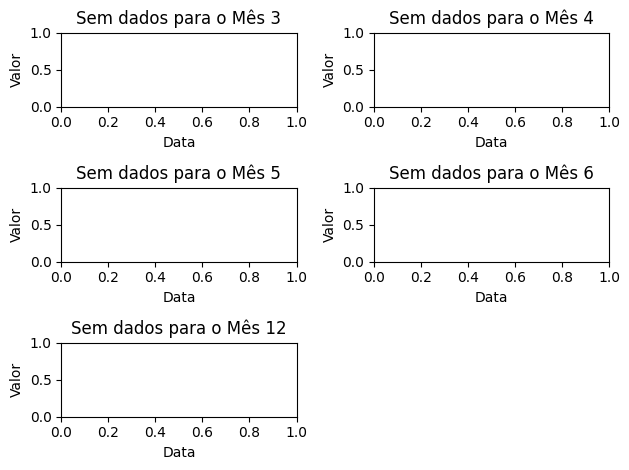

In [38]:
for i, mes in enumerate(meses_interesse, start=1):
    plt.subplot(3, 2, i)

    # Filtrando o DataFrame para o mês atual
    df = df_filtrado[df_filtrado['mês'] == mes]

    # Verificando se o DataFrame filtrado não está vazio antes de plotar
    if not df.empty:
        plt.plot(df['data'], df['valor'], marker='o', linestyle='-', label=f'Mês {mes}')
        plt.title(f'Dados do Mês {mes}')
        plt.xlabel('Data')
        plt.ylabel('Valor')
        plt.legend()
    else:
        plt.title(f'Sem dados para o Mês {mes}')
        plt.xlabel('Data')
        plt.ylabel('Valor')

plt.tight_layout()
plt.show()

In [39]:
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

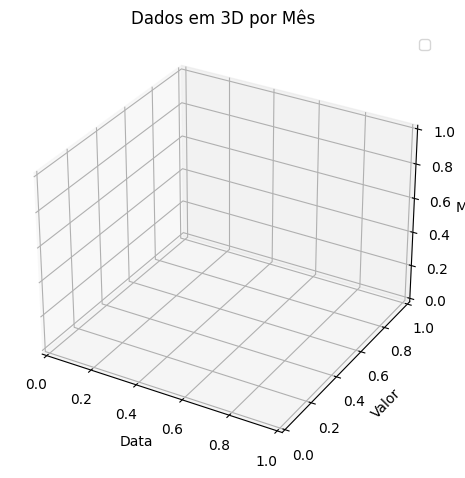

In [46]:
# Create a figure and an axes object before the loop
fig = plt.figure()  # Create the figure
ax = fig.add_subplot(111, projection='3d')  # Create a 3D axes object

for mes in meses_interesse:
    # Filtrando o DataFrame para o mês atual
    df = df_filtrado[df_filtrado['mês'] == mes]

    # Verificando se o DataFrame filtrado não está vazio antes de plotar
    if not df.empty:
        # ax.plot(x, y, z) sendo x = data, y = valor, z = mês
        ax.plot(df['data'], df['valor'], zs=mes, zdir='z', marker='o', linestyle='-', label=f'Mês {mes}')

# Configurações dos eixos
ax.set_xlabel('Data')
ax.set_ylabel('Valor')
ax.set_zlabel('Mês')
ax.set_title('Dados em 3D por Mês')

# Exibir a legenda
ax.legend()

plt.tight_layout()
plt.show()